# MC EDA Drafting

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, zscore

In [256]:
# Load
from google.colab import drive

In [257]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [258]:
train=pd.read_csv('/content/drive/MyDrive/capstone/train.csv')

In [259]:
train.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [260]:
train.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [261]:
#Renaming Columns into standards


In [262]:
new_column_names = ["Patient_Id",
                    "Patient_Age",
                    "Inherited_from_mother",
                    "Inherited_from_father",
                    "Maternal_Gene",
                    "Paternal_Gene",
                    "BCC_mcL",
                    "Patient_First_Name",
                    "Family_Name",
                    "Father_Name",
                    "Mother_Age",
                    "Father_Age",
                    "Institute_Name",
                    "Location_of_Institute",
                    "Status",
                    "Resp_Rate_BreathsPerMin",
                    "Heart_Rate_RatesPerMin",
                    "Test_1", "Test_2", "Test_3", "Test_4", "Test_5",
                    "Parental_Consent",
                    "Follow_Up",
                    "Gender",
                    "Birth_Asphyxia",
                    "Autopsy_BD",
                    "Place_Birth",
                    "Folic_Acid_Details",
                    "Serious_Maternal_Illness",
                    "Radiation_Exposure",
                    "Substance_Abuse",
                    "IVF_ART",
                    "History_Previous_Anomalies_Pregnancies",
                    "Previous_Abortion",
                    "Birth_Defects",
                    "WBC",
                    "Blood_Test",
                    "Symptom_1", "Symptom_2", "Symptom_3", "Symptom_4", "Symptom_5",
                    "Genetic_Disorder",
                    "Disorder_Subclass"]


# Rename columns using the list
train.columns = new_column_names

In [263]:
# Shape, Info
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Patient_Id                              22083 non-null  object 
 1   Patient_Age                             20656 non-null  float64
 2   Inherited_from_mother                   22083 non-null  object 
 3   Inherited_from_father                   21777 non-null  object 
 4   Maternal_Gene                           19273 non-null  object 
 5   Paternal_Gene                           22083 non-null  object 
 6   BCC_mcL                                 22083 non-null  float64
 7   Patient_First_Name                      22083 non-null  object 
 8   Family_Name                             12392 non-null  object 
 9   Father_Name                             22083 non-null  object 
 10  Mother_Age                              16047 non-null  fl

We have a good amount of null values, with many categories that could be removed instead of worrying about filling NAs, such as Family Name, parent name etc. Lets decide on these over slack.

In [264]:
describe = train.describe()
describe

,Patient_Age,BCC_mcL,Mother_Age,Father_Age,Test_1,Test_2,Test_3,Test_4,Test_5,Previous_Abortion,WBC,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
count,20656.000000,22083.000000,16047.000000,16097.000000,19956.0,19931.0,19936.0,19943.0,19913.0,19921.000000,19935.000000,19928.000000,19861.000000,19982.000000,19970.000000,19930.000000
mean,6.974148,4.898871,34.526454,41.972852,0.0,0.0,0.0,1.0,0.0,2.003062,7.486224,0.592483,0.551886,0.536233,0.497747,0.461917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,11.000000,5.033830,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.526152,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [265]:
#filling all NAN for now
print(train.isna().sum())

Patient_Id              0
Patient_Age          1427
                     ... 
Genetic_Disorder     2146
Disorder_Subclass    2168
Length: 45, dtype: int64


In [266]:
#Numeric
numeric_columns = train.select_dtypes(include=[np.number]).columns
numeric_data = train[numeric_columns]
print("Numeric NAN Before Fill:\n")
print(numeric_data.isna().sum())


Numeric NAN Before Fill:

Patient_Age    1427
BCC_mcL           0
               ... 
Symptom_4      2113
Symptom_5      2153
Length: 16, dtype: int64


In [267]:
medians = numeric_data.median()
numeric_data.fillna(medians, inplace=True)
print("Numeric NAN After Median Fill:\n")
print(numeric_data.isna().sum())

Numeric NAN After Median Fill:

Patient_Age    0
BCC_mcL        0
              ..
Symptom_4      0
Symptom_5      0
Length: 16, dtype: int64


<ipython-input-267-d782cc6da85e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data.fillna(medians, inplace=True)
<ipython-input-267-d782cc6da85e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data.fillna(medians, inplace=True)
<ipython-input-267-d782cc6da85e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [268]:
train_numfill = train
train_numfill[numeric_columns] = numeric_data
print(train_numfill.isna().sum())

Patient_Id              0
Patient_Age             0
                     ... 
Genetic_Disorder     2146
Disorder_Subclass    2168
Length: 45, dtype: int64


In [269]:
#Yes/No Columns to Binary
# Only doing Yes/No here - some other columns have other responses beyond this.
columns_to_convert = ['Inherited_from_mother', 'Inherited_from_father', 'Maternal_Gene', 'Paternal_Gene', 'Parental_Consent', 'Serious_Maternal_Illness', 'IVF_ART', 'History_Previous_Anomalies_Pregnancies']

# Mapping 'yes' to 1 and 'no' to 0 for specified columns
for column in columns_to_convert:
    train_numfill[column] = train_numfill[column].map({'Yes': 1, 'No': 0})

In [270]:
train_numfill.head()

,Patient_Id,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Patient_First_Name,Family_Name,Father_Name,Mother_Age,Father_Age,Institute_Name,Location_of_Institute,Status,Resp_Rate_BreathsPerMin,Heart_Rate_RatesPerMin,Test_1,Test_2,Test_3,Test_4,Test_5,Parental_Consent,Follow_Up,Gender,Birth_Asphyxia,Autopsy_BD,Place_Birth,Folic_Acid_Details,Serious_Maternal_Illness,Radiation_Exposure,Substance_Abuse,IVF_ART,History_Previous_Anomalies_Pregnancies,Previous_Abortion,Birth_Defects,WBC,Blood_Test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass
0,PID0x6418,2.0,1,0.0,1.0,0,4.760603,Richard,NaN,Larre,35.0,42.0,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,0.0,1.0,2.0,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,1,1.0,0.0,0,4.910669,Mike,NaN,Brycen,35.0,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,NaN,No,None,NaN,Yes,1.0,Not applicable,Not applicable,0.0,1.0,2.0,Multiple,5.522560,normal,1.0,1.0,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,1,0.0,0.0,0,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,1.0,Low,NaN,No record,Not applicable,NaN,Yes,0.0,Yes,NaN,1.0,1.0,4.0,Singular,7.477132,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,1,0.0,1.0,0,4.705280,Jeffery,Hoelscher,Aayaan,21.0,42.0,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,Male,Not available,No,Institute,No,1.0,-,Not applicable,NaN,1.0,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,1,0.0,NaN,1,4.720703,Johanna,Stutzman,Suave,32.0,42.0,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,1.0,-,Not applicable,1.0,0.0,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer


In [271]:
print("INFO:\n")
print(train_numfill.info())

INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Patient_Id                              22083 non-null  object 
 1   Patient_Age                             22083 non-null  float64
 2   Inherited_from_mother                   22083 non-null  int64  
 3   Inherited_from_father                   21777 non-null  float64
 4   Maternal_Gene                           19273 non-null  float64
 5   Paternal_Gene                           22083 non-null  int64  
 6   BCC_mcL                                 22083 non-null  float64
 7   Patient_First_Name                      22083 non-null  object 
 8   Family_Name                             12392 non-null  object 
 9   Father_Name                             22083 non-null  object 
 10  Mother_Age                              22083 non-n

In [272]:
print("Inherited_from_father VALUES:\n")
print(train_numfill["Inherited_from_father"].value_counts())

Inherited_from_father VALUES:

0.0    13133
1.0     8644
Name: Inherited_from_father, dtype: int64


In [273]:
print("Inherited_from_mother VALUES:\n")
print(train_numfill["Inherited_from_mother"].value_counts())

Inherited_from_mother VALUES:

1    13143
0     8940
Name: Inherited_from_mother, dtype: int64


In [274]:
print("Correlation:")
print(train.corr())

Correlation:
                       Patient_Age  Inherited_from_mother  \
Patient_Age               1.000000               0.004081   
Inherited_from_mother     0.004081               1.000000   
...                            ...                    ...   
Symptom_4                -0.008555               0.011139   
Symptom_5                -0.012057               0.013832   

                       Inherited_from_father  Maternal_Gene  Paternal_Gene  \
Patient_Age                        -0.006571      -0.001132      -0.003947   
Inherited_from_mother               0.008752       0.099029      -0.007389   
...                                      ...            ...            ...   
Symptom_4                           0.006090       0.013220       0.011039   
Symptom_5                           0.020304       0.018548       0.006553   

                        BCC_mcL  Mother_Age  Father_Age  Test_1  Test_2  \
Patient_Age            0.010456   -0.006664   -0.008167     NaN     NaN   
I

<ipython-input-274-ba0be6037379>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train.corr())


In [275]:
print("Covariance:")
print(train_numfill.cov())

Covariance:
                       Patient_Age  Inherited_from_mother  \
Patient_Age              17.452182               0.008370   
Inherited_from_mother     0.008370               0.240955   
...                            ...                    ...   
Symptom_4                -0.017781               0.002720   
Symptom_5                -0.024834               0.003348   

                       Inherited_from_father  Maternal_Gene  Paternal_Gene  \
Patient_Age                        -0.013439      -0.002356      -0.008172   
Inherited_from_mother               0.002102       0.024181      -0.001798   
...                                      ...            ...            ...   
Symptom_4                           0.001482       0.003273       0.002722   
Symptom_5                           0.004899       0.004552       0.001601   

                        BCC_mcL  Mother_Age  Father_Age  Test_1  Test_2  \
Patient_Age            0.008722   -0.233890   -0.379701     0.0     0.0   
In

<ipython-input-275-6f5146a403e7>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train_numfill.cov())


In [276]:
# View genetic disorders
print(train_numfill['Genetic_Disorder'].value_counts())
print(train_numfill['Disorder_Subclass'].value_counts())

disorders = train_numfill['Genetic_Disorder'].unique()
disorderSub = train_numfill['Disorder_Subclass'].unique()

print(len(disorders), disorders)
print(len(disorderSub), disorderSub)

Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: Genetic_Disorder, dtype: int64
Leigh syndrome            5160
Mitochondrial myopathy    4405
                          ... 
Alzheimer's                152
Cancer                      97
Name: Disorder_Subclass, Length: 9, dtype: int64
4 ['Mitochondrial genetic inheritance disorders' nan
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
10 ["Leber's hereditary optic neuropathy" 'Cystic fibrosis' 'Diabetes'
 'Leigh syndrome' 'Cancer' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' nan "Alzheimer's"]


In [277]:
# View disorder / disorder subclass relationship
disorderSubclasses = train_numfill.groupby(['Genetic_Disorder','Disorder_Subclass']).size()
disorderSubclasses

Genetic_Disorder                             Disorder_Subclass                  
Mitochondrial genetic inheritance disorders  Leber's hereditary optic neuropathy     587
                                             Leigh syndrome                         4683
                                                                                    ... 
Single-gene inheritance diseases             Hemochromatosis                        1228
                                             Tay-Sachs                              2556
Length: 9, dtype: int64

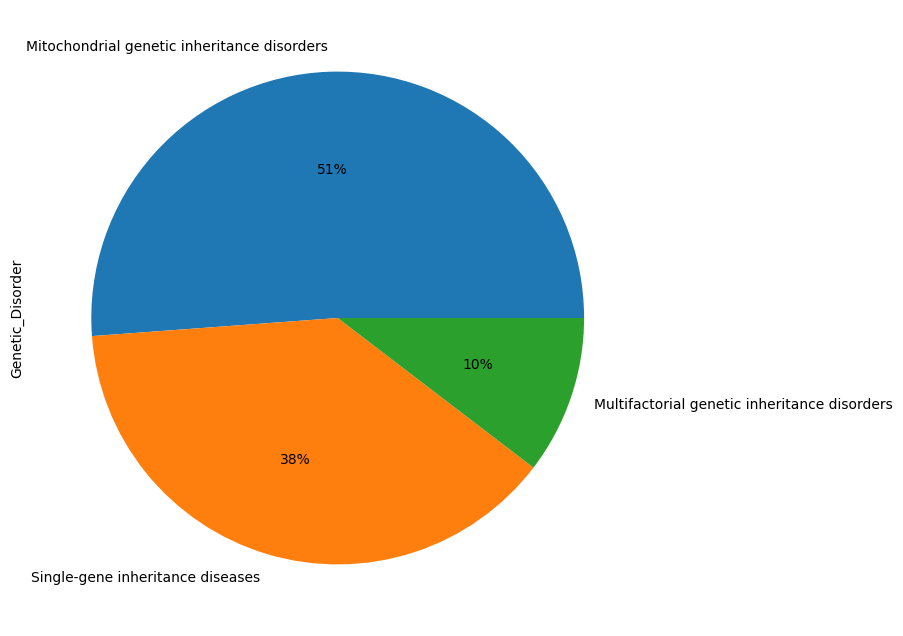

In [278]:
# Plot distribution of genetic disorders
figure = plt.figure(figsize=(20,8))
train_numfill['Genetic_Disorder'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

In [279]:
import seaborn as sns

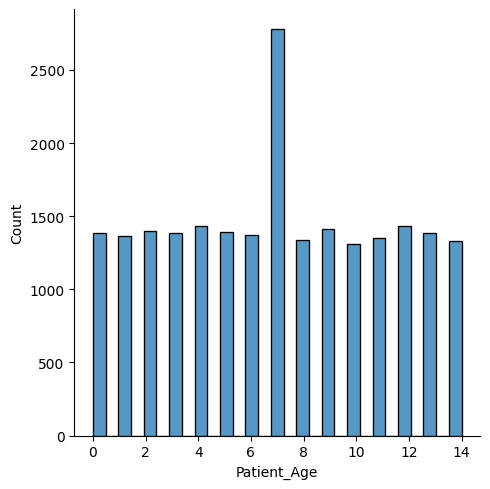

In [280]:
sns.displot(x = 'Patient_Age', data = train_numfill);

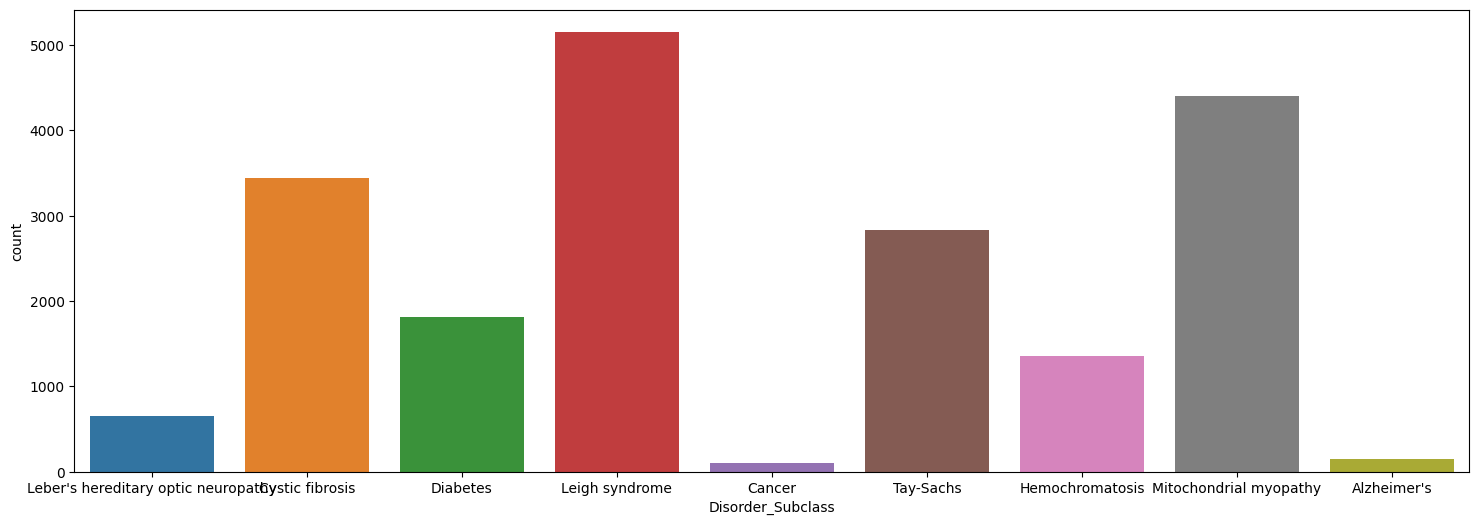

In [281]:
plt.figure(figsize=(18, 6))
sns.countplot(x = 'Disorder_Subclass', data = train_numfill);

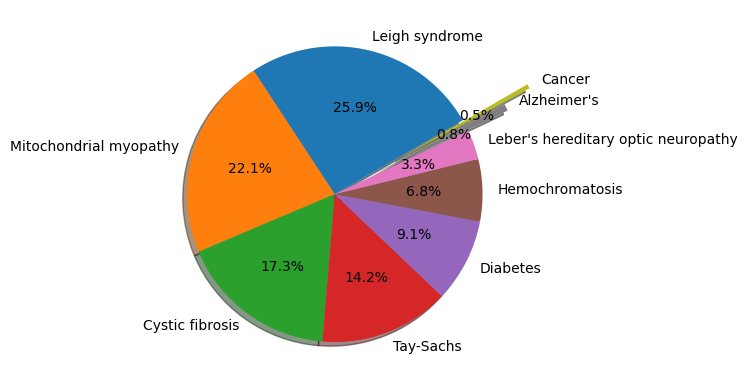

In [282]:
#visualizing in Pie chart
labels2 = 'Leigh syndrome', 'Mitochondrial myopathy', 'Cystic fibrosis', 'Tay-Sachs', 'Diabetes', 'Hemochromatosis', "Leber's hereditary optic neuropathy", "Alzheimer's", 'Cancer'
explode2 = (0, 0, 0, 0, 0, 0, 0, 0.3, 0.5)

plt.pie(train_numfill.Disorder_Subclass.value_counts(), explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=30);

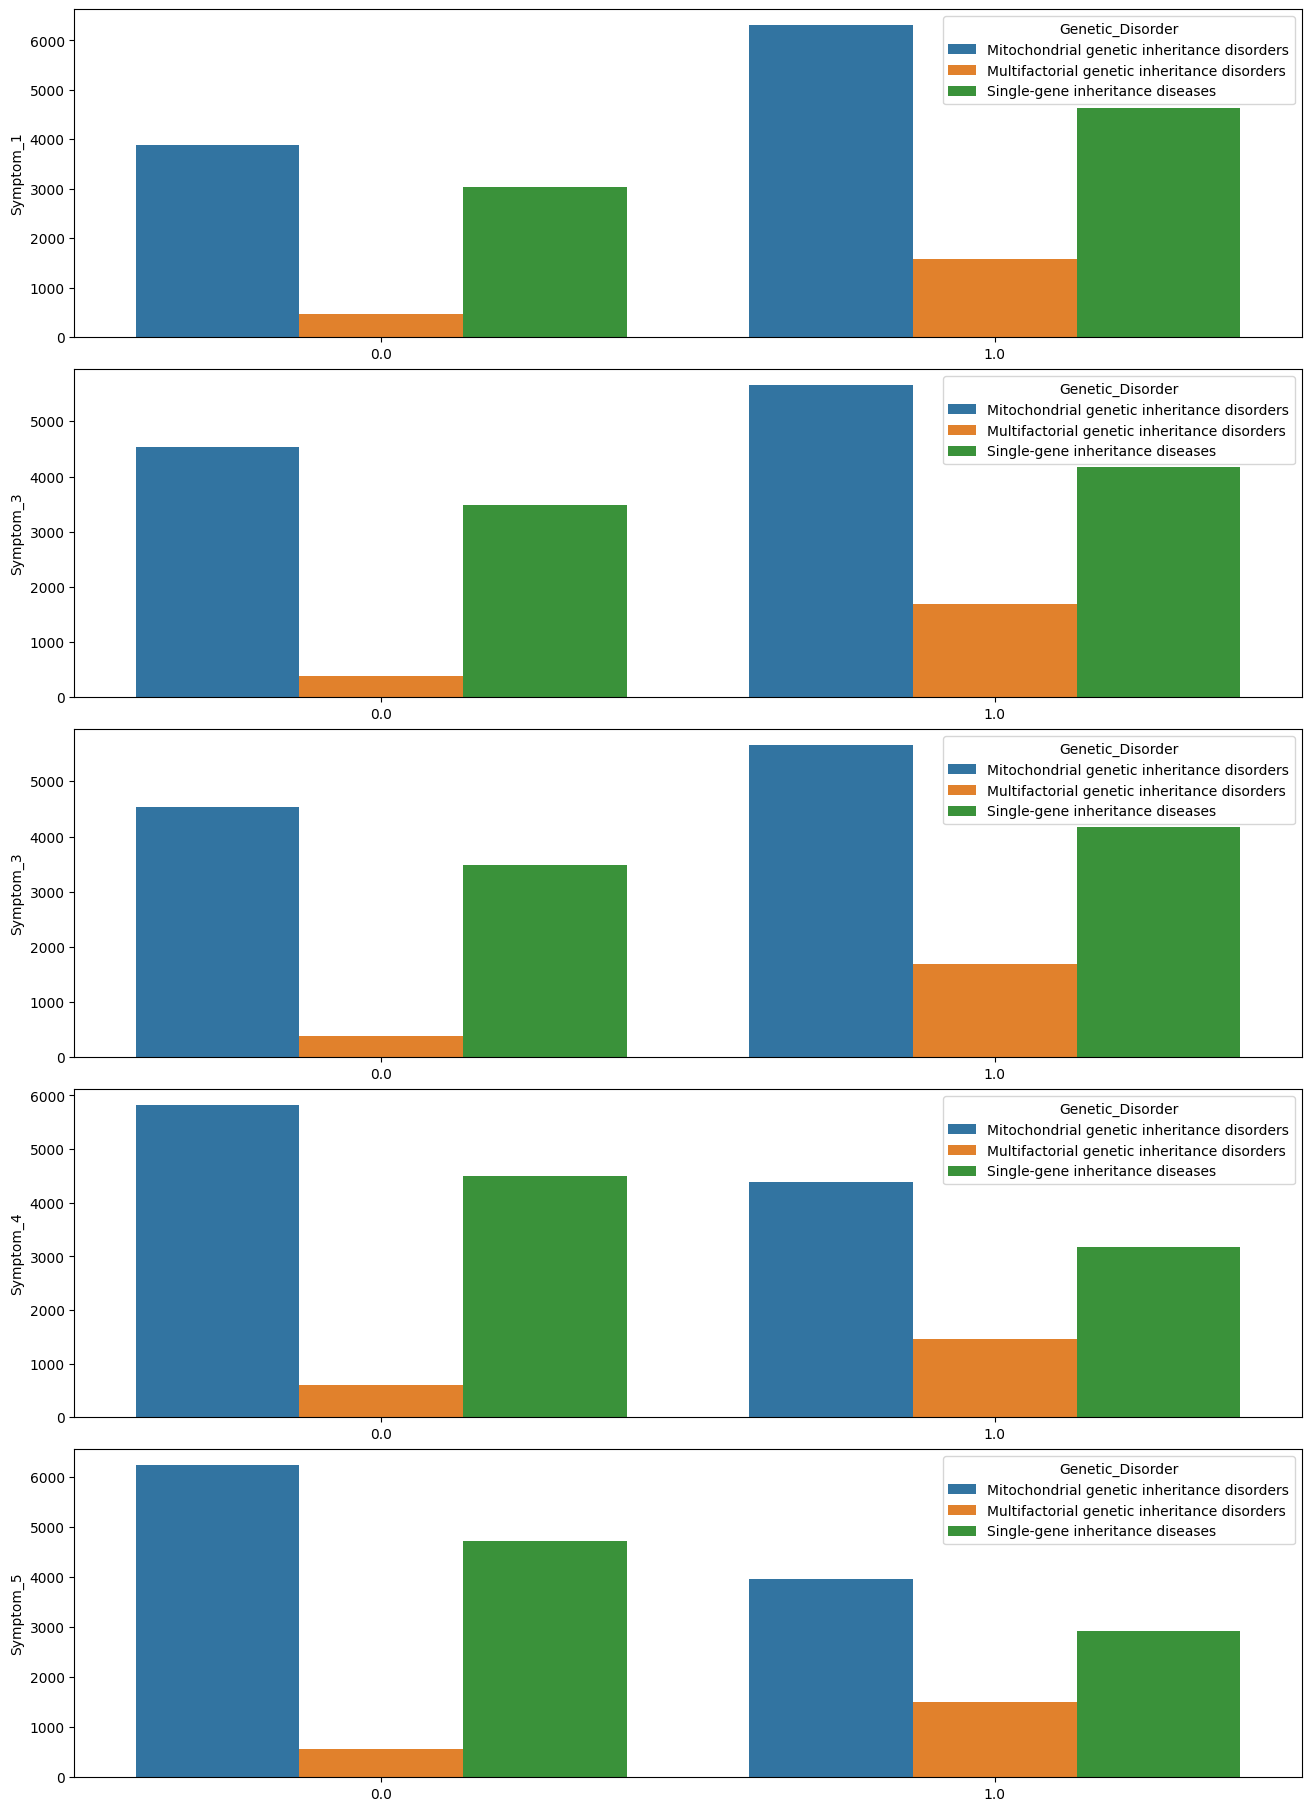

In [283]:
symptom  = ['Symptom_1', 'Symptom_3', 'Symptom_3', 'Symptom_4', 'Symptom_5']

fig, ax = plt.subplots(len(symptom),  figsize = (13, 18), constrained_layout = True)

for i, var in enumerate(symptom):
    sns.countplot(data = train_numfill, x = var, hue = 'Genetic_Disorder', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

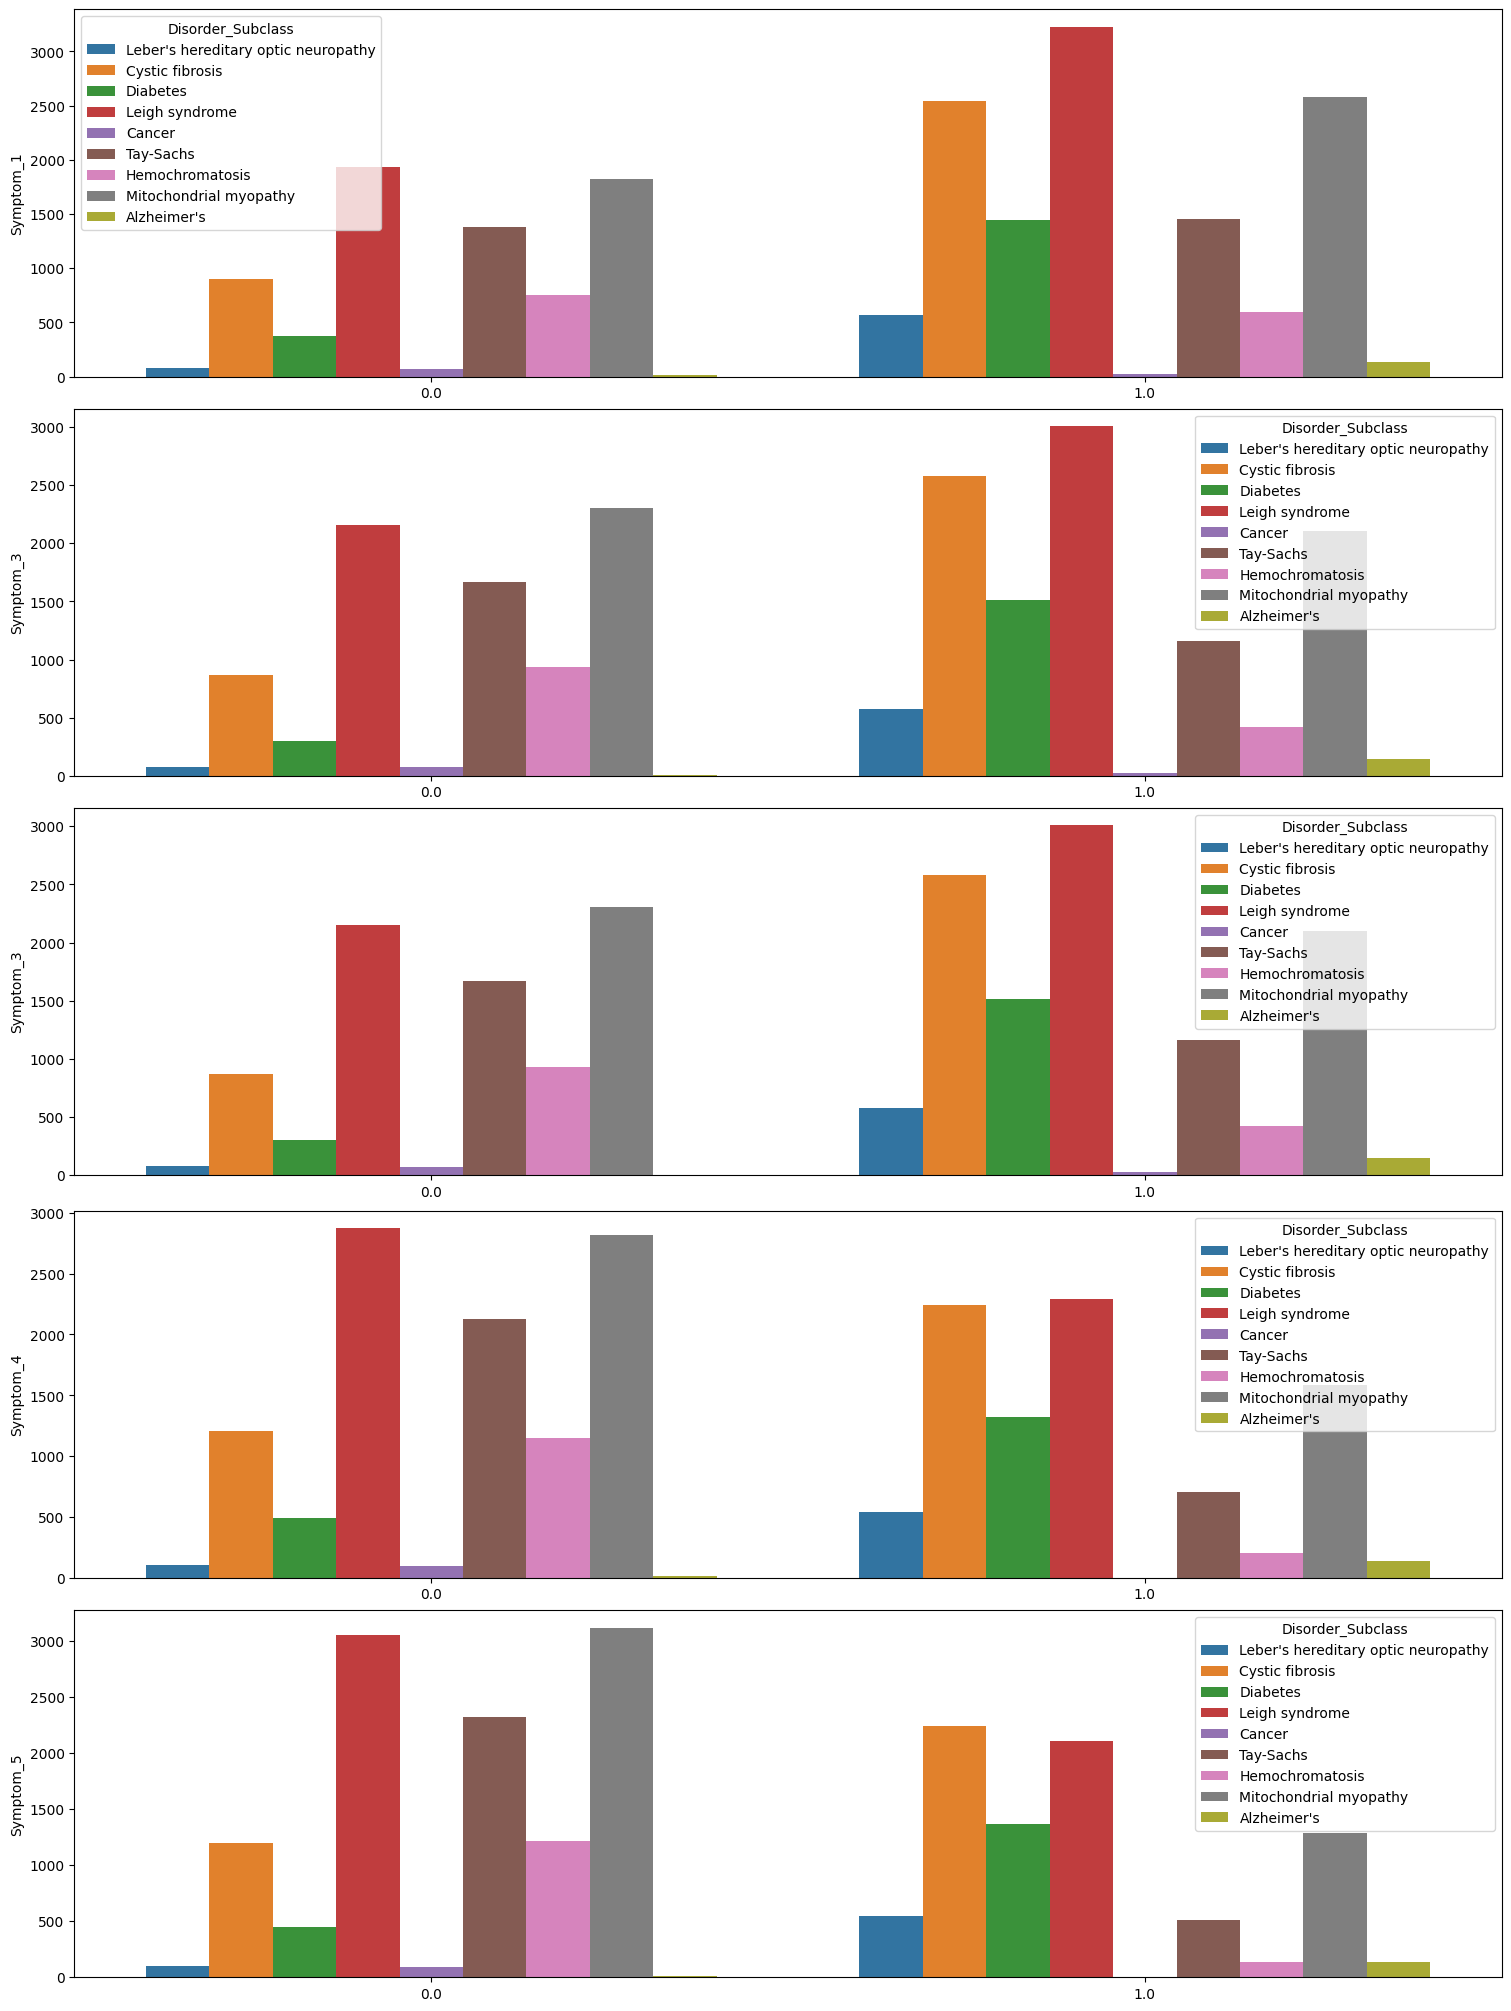

In [284]:
symptom  = ['Symptom_1', 'Symptom_3', 'Symptom_3', 'Symptom_4', 'Symptom_5']

fig, ax = plt.subplots(len(symptom),  figsize = (15, 20), constrained_layout = True)

for i, var in enumerate(symptom):
    sns.countplot(data = train_numfill, x = var, hue = 'Disorder_Subclass', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

In [285]:
# One-hot encode disorders to look for correlations between disorder and data
train_numfill['Disorder+Subclass'] = train['Genetic_Disorder'] + ' - ' + train['Disorder_Subclass']
onehot = pd.get_dummies(train_numfill['Disorder+Subclass'])
train_numfill.drop(['Genetic_Disorder', 'Disorder_Subclass','Disorder+Subclass'], axis=1, inplace=True)
train_numfill = train_numfill.join(onehot)
train_numfill.head()

,Patient_Id,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Patient_First_Name,Family_Name,Father_Name,Mother_Age,Father_Age,Institute_Name,Location_of_Institute,Status,Resp_Rate_BreathsPerMin,Heart_Rate_RatesPerMin,Test_1,Test_2,Test_3,Test_4,Test_5,Parental_Consent,Follow_Up,Gender,Birth_Asphyxia,Autopsy_BD,Place_Birth,Folic_Acid_Details,Serious_Maternal_Illness,Radiation_Exposure,Substance_Abuse,IVF_ART,History_Previous_Anomalies_Pregnancies,Previous_Abortion,Birth_Defects,WBC,Blood_Test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders - Leigh syndrome,Mitochondrial genetic inheritance disorders - Mitochondrial myopathy,Multifactorial genetic inheritance disorders - Alzheimer's,Multifactorial genetic inheritance disorders - Cancer,Multifactorial genetic inheritance disorders - Diabetes,Single-gene inheritance diseases - Cystic fibrosis,Single-gene inheritance diseases - Hemochromatosis,Single-gene inheritance diseases - Tay-Sachs
0,PID0x6418,2.0,1,0.0,1.0,0,4.760603,Richard,NaN,Larre,35.0,42.0,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,0.0,1.0,2.0,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0
1,PID0x25d5,4.0,1,1.0,0.0,0,4.910669,Mike,NaN,Brycen,35.0,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,NaN,No,None,NaN,Yes,1.0,Not applicable,Not applicable,0.0,1.0,2.0,Multiple,5.522560,normal,1.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0
2,PID0x4a82,6.0,1,0.0,0.0,0,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,1.0,Low,NaN,No record,Not applicable,NaN,Yes,0.0,Yes,NaN,1.0,1.0,4.0,Singular,7.477132,normal,0.0,1.0,1.0,1.0,1.0,0,0,0,0,0,1,0,0,0
3,PID0x4ac8,12.0,1,0.0,1.0,0,4.705280,Jeffery,Hoelscher,Aayaan,21.0,42.0,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,Male,Not available,No,Institute,No,1.0,-,Not applicable,NaN,1.0,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0
4,PID0x1bf7,11.0,1,0.0,NaN,1,4.720703,Johanna,Stutzman,Suave,32.0,42.0,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,1.0,-,Not applicable,1.0,0.0,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0


In [286]:
# Calculate correlations
train_numfill_corr = train_numfill.corr()

<ipython-input-286-9915425869bc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_numfill_corr = train_numfill.corr()


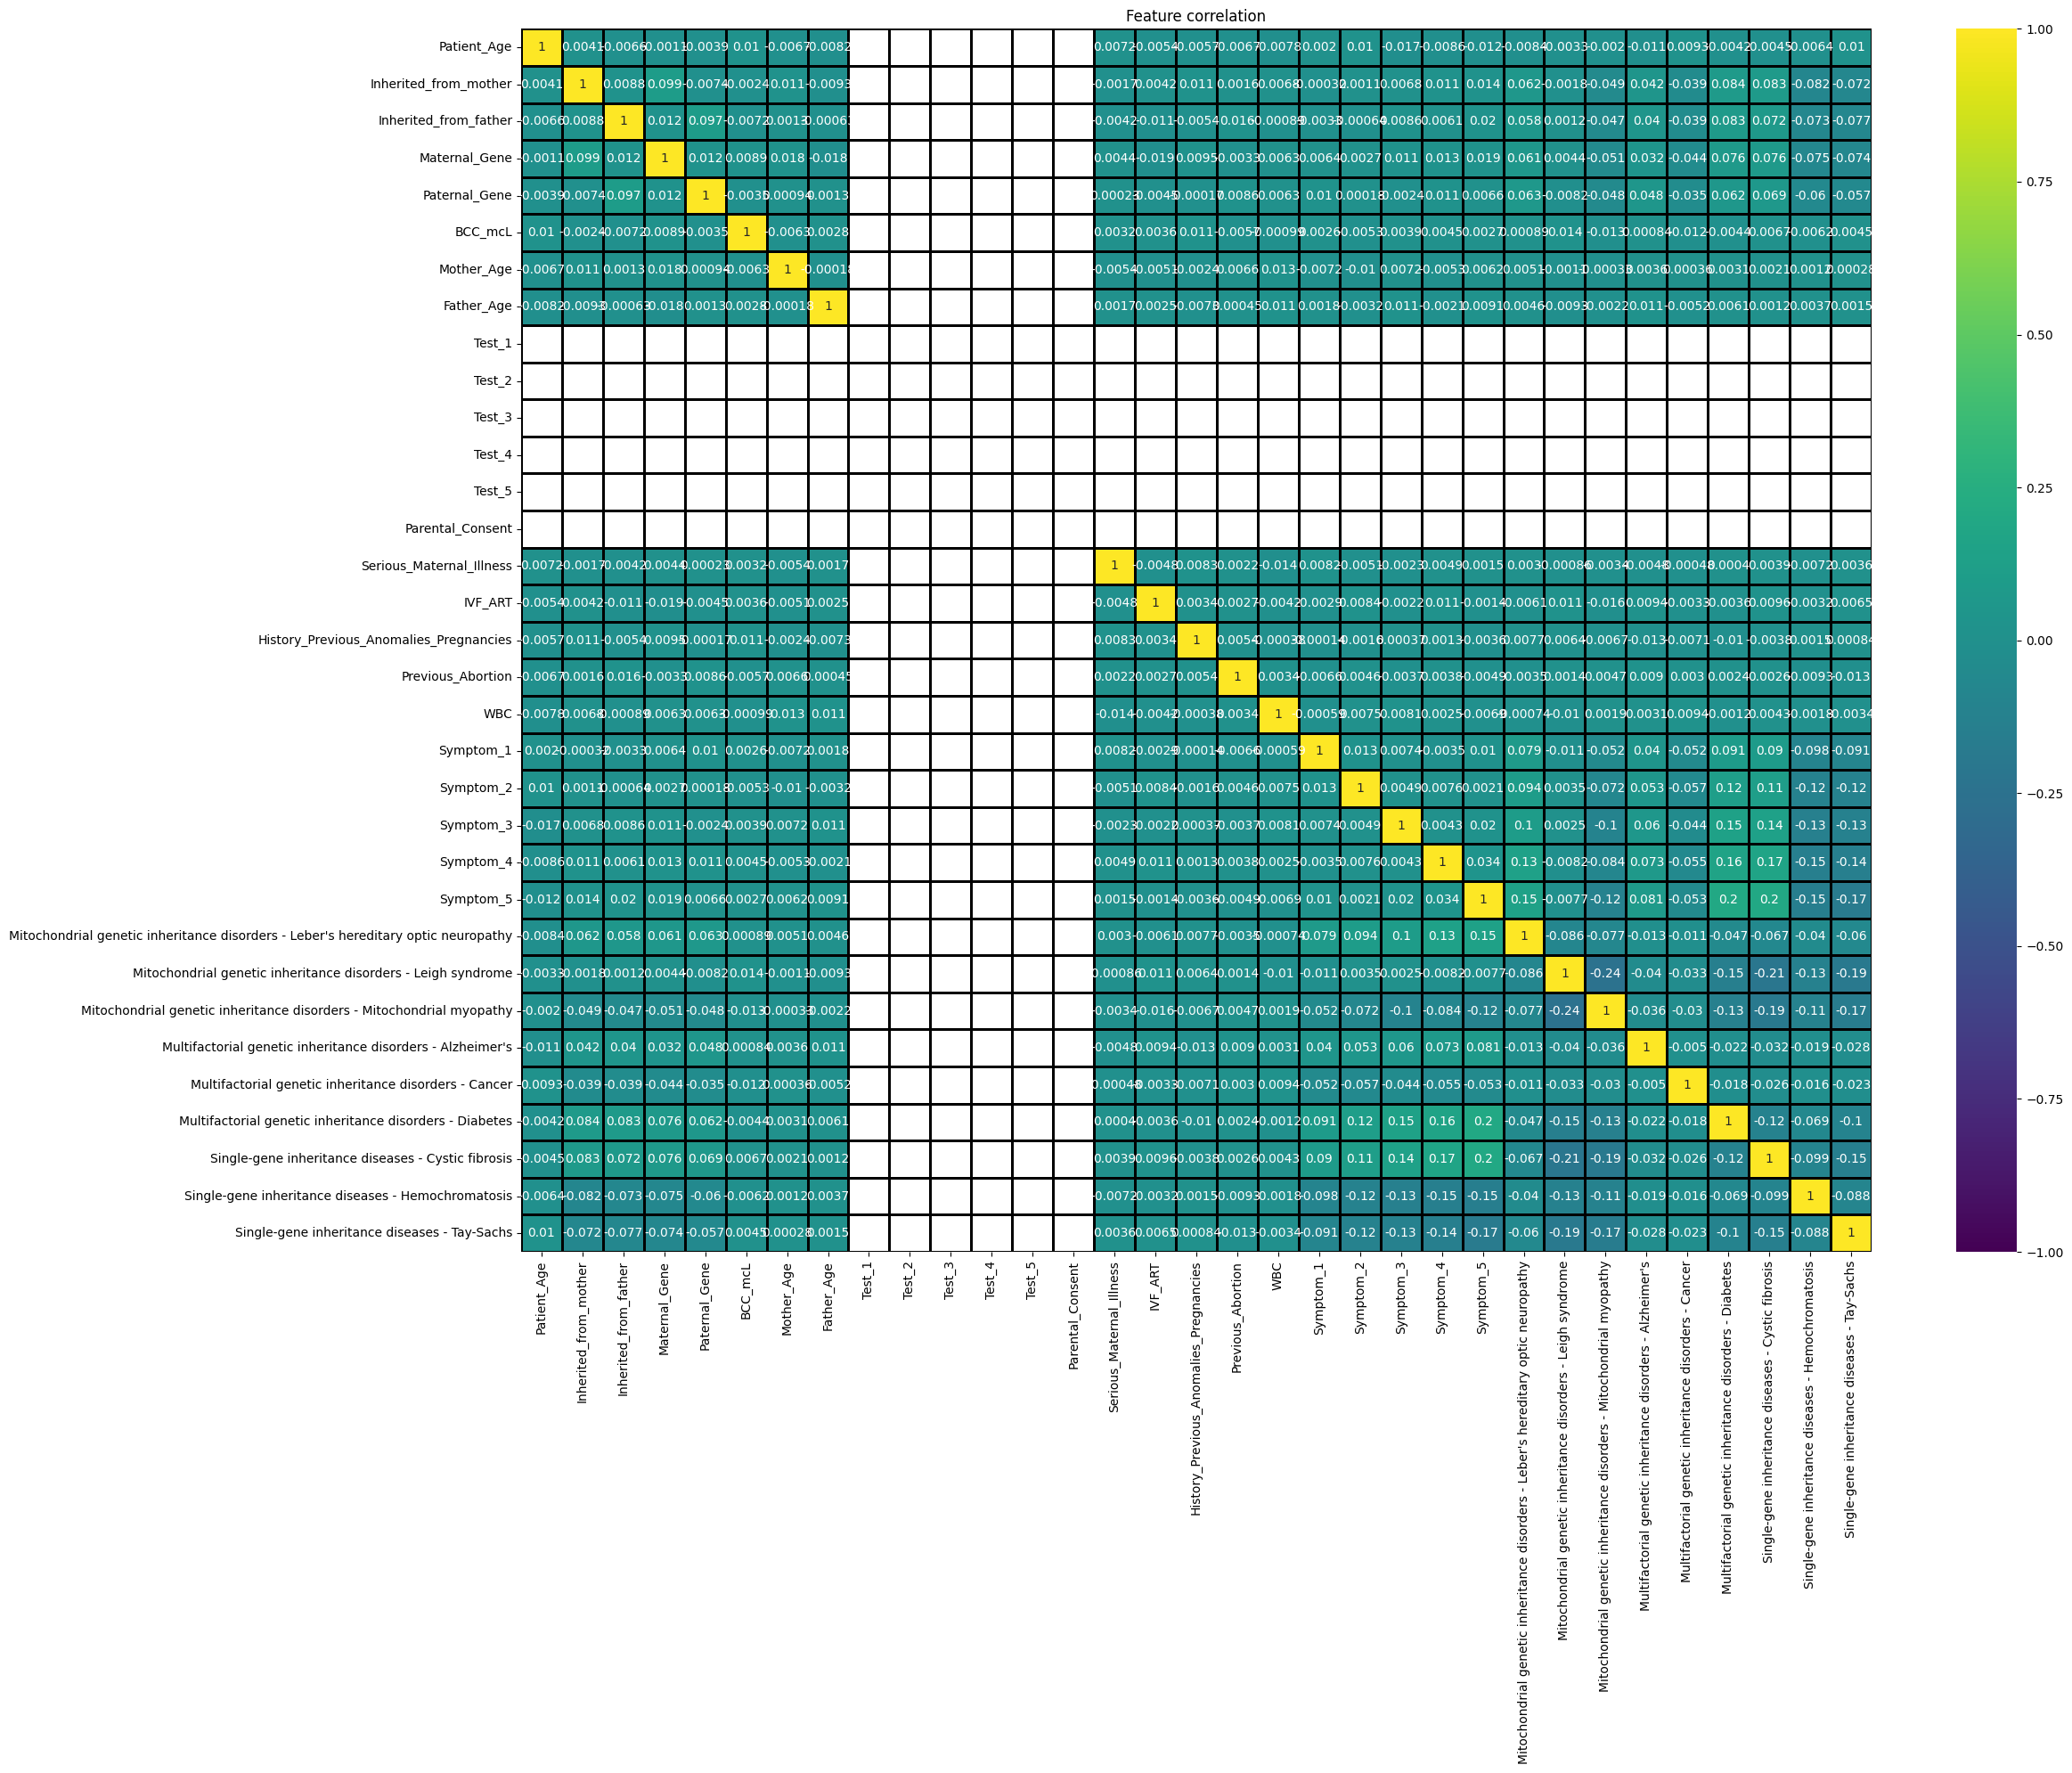

In [287]:
# Plot correlation heatmap with one-hot encoded disorders
figure = plt.figure(figsize=(25,20))
sns.heatmap(train_numfill_corr,annot=True,vmin=-1,center=0,vmax=1,linewidths=2,linecolor="black",cmap="viridis")
plt.title("Feature correlation")
plt.tight_layout()
plt.show()

## Skew & Outlier Detection

In [288]:
columns_to_drop = [
    "Patient_Id",
    "Patient_First_Name",
    "Family_Name",
    "Father_Name",
    "Institute_Name",
    "Location_of_Institute",
]

train_2 = train_numfill.drop(columns=columns_to_drop)
train_2.head()

,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Mother_Age,Father_Age,Status,Resp_Rate_BreathsPerMin,Heart_Rate_RatesPerMin,Test_1,Test_2,Test_3,Test_4,Test_5,Parental_Consent,Follow_Up,Gender,Birth_Asphyxia,Autopsy_BD,Place_Birth,Folic_Acid_Details,Serious_Maternal_Illness,Radiation_Exposure,Substance_Abuse,IVF_ART,History_Previous_Anomalies_Pregnancies,Previous_Abortion,Birth_Defects,WBC,Blood_Test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders - Leigh syndrome,Mitochondrial genetic inheritance disorders - Mitochondrial myopathy,Multifactorial genetic inheritance disorders - Alzheimer's,Multifactorial genetic inheritance disorders - Cancer,Multifactorial genetic inheritance disorders - Diabetes,Single-gene inheritance diseases - Cystic fibrosis,Single-gene inheritance diseases - Hemochromatosis,Single-gene inheritance diseases - Tay-Sachs
0,2.0,1,0.0,1.0,0,4.760603,35.0,42.0,Alive,Normal (30-60),Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,0.0,1.0,2.0,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0
1,4.0,1,1.0,0.0,0,4.910669,35.0,23.0,Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,NaN,No,None,NaN,Yes,1.0,Not applicable,Not applicable,0.0,1.0,2.0,Multiple,5.522560,normal,1.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0
2,6.0,1,0.0,0.0,0,4.893297,41.0,22.0,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,1.0,Low,NaN,No record,Not applicable,NaN,Yes,0.0,Yes,NaN,1.0,1.0,4.0,Singular,7.477132,normal,0.0,1.0,1.0,1.0,1.0,0,0,0,0,0,1,0,0,0
3,12.0,1,0.0,1.0,0,4.705280,21.0,42.0,Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,Male,Not available,No,Institute,No,1.0,-,Not applicable,NaN,1.0,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0
4,11.0,1,0.0,NaN,1,4.720703,32.0,42.0,Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,1.0,-,Not applicable,1.0,0.0,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0


In [289]:
genetic_disorder_columns = [
    "Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy",
    "Mitochondrial genetic inheritance disorders - Leigh syndrome",
    "Mitochondrial genetic inheritance disorders - Mitochondrial myopathy",
    "Multifactorial genetic inheritance disorders - Alzheimer's",
    "Multifactorial genetic inheritance disorders - Cancer",
    "Multifactorial genetic inheritance disorders - Diabetes",
    "Single-gene inheritance diseases - Cystic fibrosis",
    "Single-gene inheritance diseases - Hemochromatosis",
    "Single-gene inheritance diseases - Tay-Sachs",
]

# Create the new "Genetic_Disorder" column
train_2['Genetic_Disorder'] = train_2[genetic_disorder_columns].any(axis=1).astype(int)
train_2.head()

,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Mother_Age,Father_Age,Status,Resp_Rate_BreathsPerMin,Heart_Rate_RatesPerMin,Test_1,Test_2,Test_3,Test_4,Test_5,Parental_Consent,Follow_Up,Gender,Birth_Asphyxia,Autopsy_BD,Place_Birth,Folic_Acid_Details,Serious_Maternal_Illness,Radiation_Exposure,Substance_Abuse,IVF_ART,History_Previous_Anomalies_Pregnancies,Previous_Abortion,Birth_Defects,WBC,Blood_Test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders - Leigh syndrome,Mitochondrial genetic inheritance disorders - Mitochondrial myopathy,Multifactorial genetic inheritance disorders - Alzheimer's,Multifactorial genetic inheritance disorders - Cancer,Multifactorial genetic inheritance disorders - Diabetes,Single-gene inheritance diseases - Cystic fibrosis,Single-gene inheritance diseases - Hemochromatosis,Single-gene inheritance diseases - Tay-Sachs,Genetic_Disorder
0,2.0,1,0.0,1.0,0,4.760603,35.0,42.0,Alive,Normal (30-60),Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,0.0,1.0,2.0,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,1
1,4.0,1,1.0,0.0,0,4.910669,35.0,23.0,Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,NaN,No,None,NaN,Yes,1.0,Not applicable,Not applicable,0.0,1.0,2.0,Multiple,5.522560,normal,1.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,6.0,1,0.0,0.0,0,4.893297,41.0,22.0,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,1.0,Low,NaN,No record,Not applicable,NaN,Yes,0.0,Yes,NaN,1.0,1.0,4.0,Singular,7.477132,normal,0.0,1.0,1.0,1.0,1.0,0,0,0,0,0,1,0,0,0,1
3,12.0,1,0.0,1.0,0,4.705280,21.0,42.0,Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,Male,Not available,No,Institute,No,1.0,-,Not applicable,NaN,1.0,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1
4,11.0,1,0.0,NaN,1,4.720703,32.0,42.0,Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,1.0,-,Not applicable,1.0,0.0,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1


In [290]:
def skew_and_outlier_test(df, skew_threshold=1.0, zscore_threshold=3.0):
    # Identify numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

    # Convert numeric columns to numeric type
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    skewed_columns = []

    # Identify skewed columns
    for column in numeric_columns:
        # Skewness test
        column_skewness = skew(df[column].dropna(), nan_policy='omit')
        if abs(column_skewness) > skew_threshold:
            skewed_columns.append(column)

            # Outlier test using Z-score
            column_data = df[column].dropna()
            if len(column_data) > 0:
                z_scores = zscore(column_data)
                outlier_count = np.sum(abs(z_scores) > zscore_threshold)
                print(f"Column '{column}': Number of outliers - {outlier_count}")

    # Determine the number of rows and columns for subplots
    num_skewed_columns = len(skewed_columns)
    num_rows = (num_skewed_columns // 3) + (1 if num_skewed_columns % 3 > 0 else 0)
    num_cols = min(3, num_skewed_columns)

    # Plot all skewed columns in a grid
    if skewed_columns:
        plt.figure(figsize=(12, 4 * num_rows))
        for i, column in enumerate(skewed_columns, 1):
            plt.subplot(num_rows, num_cols, i)
            df[column].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7)
            plt.title(f'Binary Column: {column}')
            plt.xlabel('Values')
            plt.ylabel('Frequency')

        # Adjust layout and show the plot
        plt.tight_layout()
        plt.show()

    return skewed_columns


<ipython-input-290-f72c1d432f23>:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  column_skewness = skew(df[column].dropna(), nan_policy='omit')


Column 'Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy': Number of outliers - 587
Column 'Mitochondrial genetic inheritance disorders - Leigh syndrome': Number of outliers - 0
Column 'Mitochondrial genetic inheritance disorders - Mitochondrial myopathy': Number of outliers - 0
Column 'Multifactorial genetic inheritance disorders - Alzheimer's': Number of outliers - 133
Column 'Multifactorial genetic inheritance disorders - Cancer': Number of outliers - 91
Column 'Multifactorial genetic inheritance disorders - Diabetes': Number of outliers - 1653
Column 'Single-gene inheritance diseases - Cystic fibrosis': Number of outliers - 0
Column 'Single-gene inheritance diseases - Hemochromatosis': Number of outliers - 1228
Column 'Single-gene inheritance diseases - Tay-Sachs': Number of outliers - 0
Column 'Genetic_Disorder': Number of outliers - 0


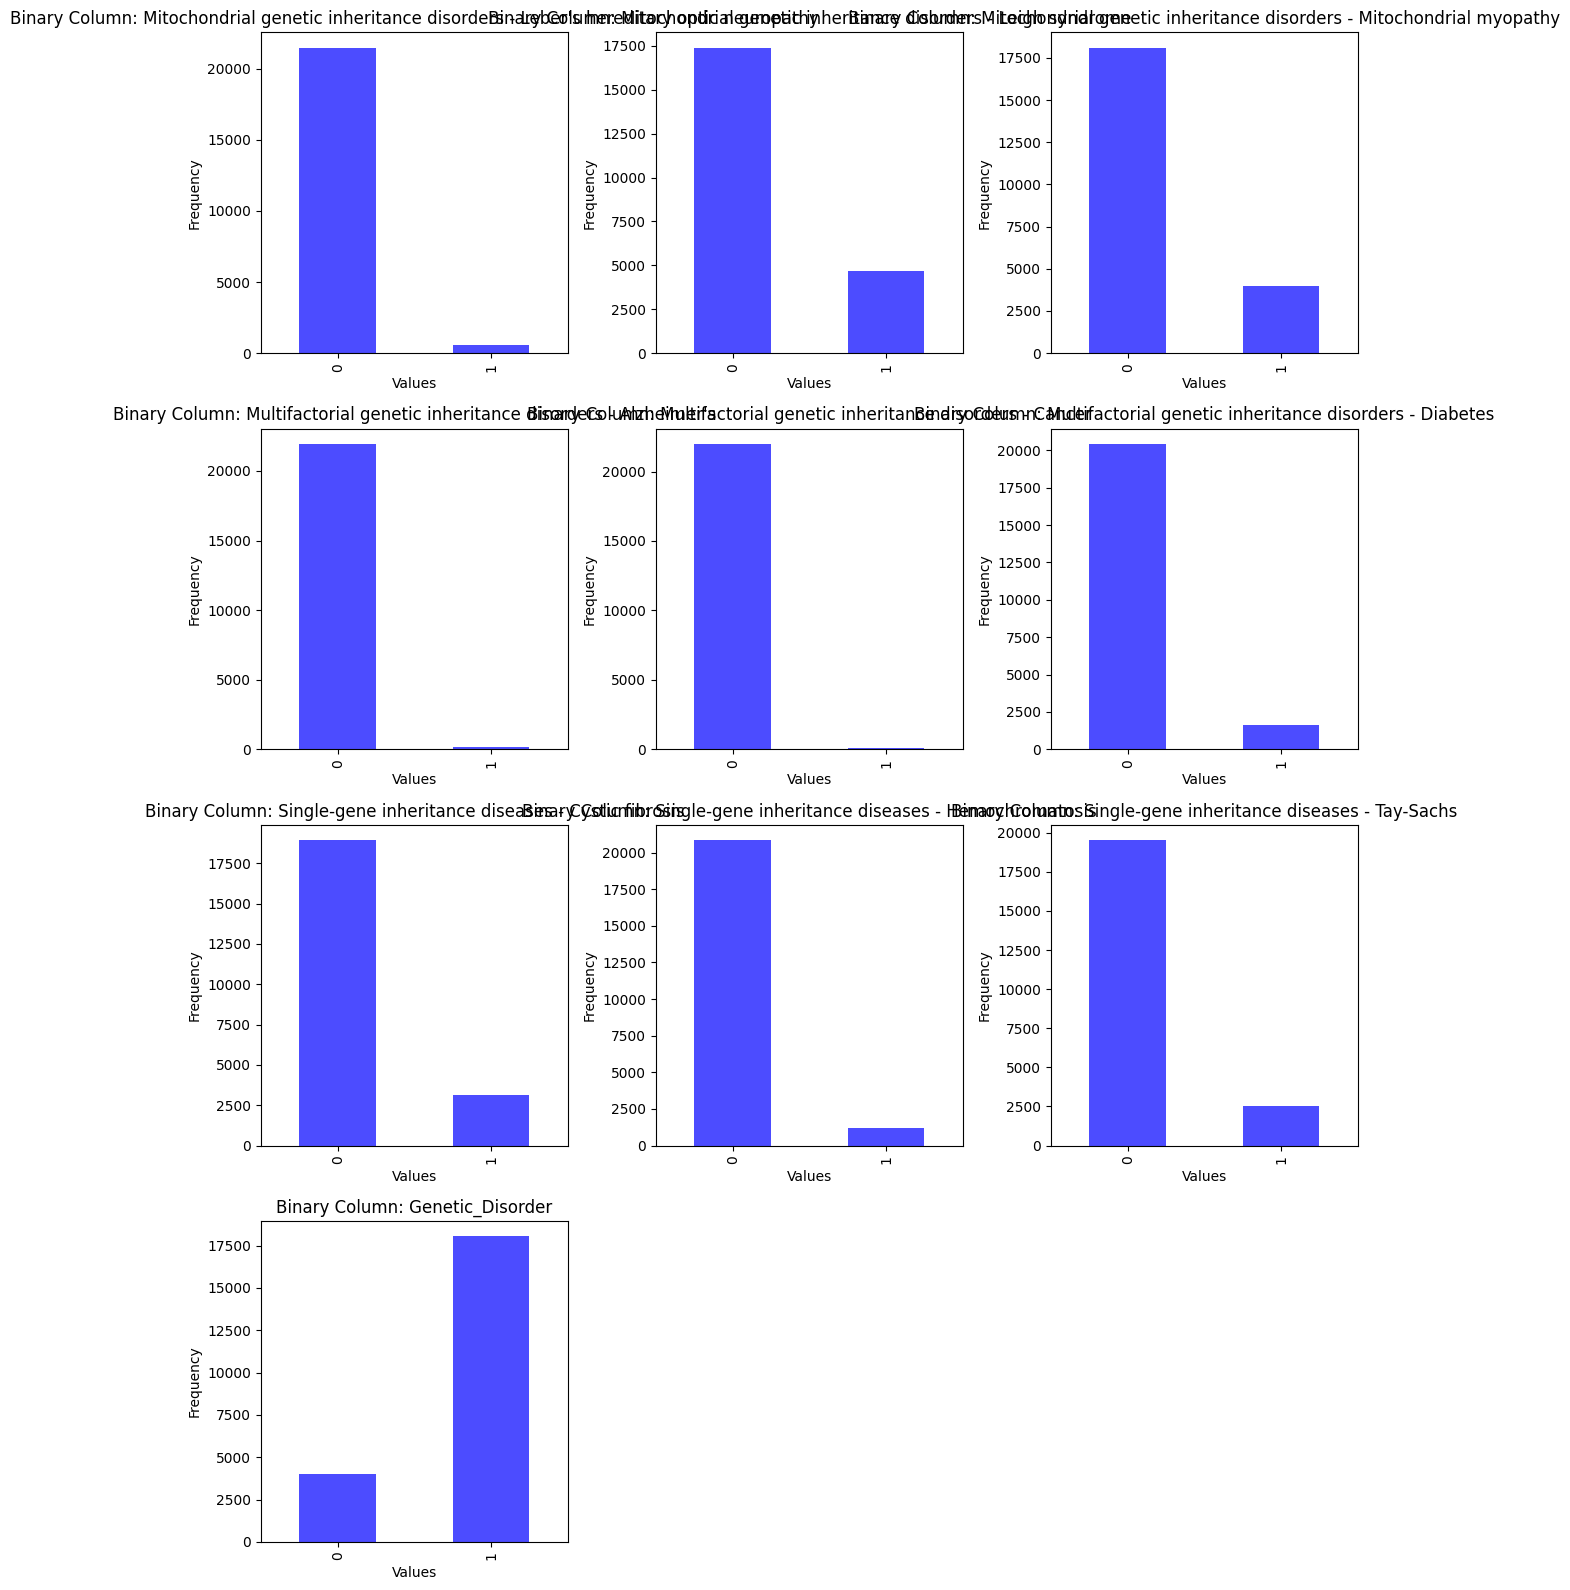

Skewed Columns in 'train_2': ["Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy", 'Mitochondrial genetic inheritance disorders - Leigh syndrome', 'Mitochondrial genetic inheritance disorders - Mitochondrial myopathy', "Multifactorial genetic inheritance disorders - Alzheimer's", 'Multifactorial genetic inheritance disorders - Cancer', 'Multifactorial genetic inheritance disorders - Diabetes', 'Single-gene inheritance diseases - Cystic fibrosis', 'Single-gene inheritance diseases - Hemochromatosis', 'Single-gene inheritance diseases - Tay-Sachs', 'Genetic_Disorder']


In [291]:
skewed_columns_train = skew_and_outlier_test(train_2)

print("Skewed Columns in 'train_2':", skewed_columns_train)

We have a ton of outliers and skewed columns. Most of these are class imbalances in our disease subgroups. ALso note to self rename these columns so they read better

## Dummies for Cat Columms

In [292]:
train_2.head(5)

,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Mother_Age,Father_Age,Status,Resp_Rate_BreathsPerMin,Heart_Rate_RatesPerMin,Test_1,Test_2,Test_3,Test_4,Test_5,Parental_Consent,Follow_Up,Gender,Birth_Asphyxia,Autopsy_BD,Place_Birth,Folic_Acid_Details,Serious_Maternal_Illness,Radiation_Exposure,Substance_Abuse,IVF_ART,History_Previous_Anomalies_Pregnancies,Previous_Abortion,Birth_Defects,WBC,Blood_Test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders - Leigh syndrome,Mitochondrial genetic inheritance disorders - Mitochondrial myopathy,Multifactorial genetic inheritance disorders - Alzheimer's,Multifactorial genetic inheritance disorders - Cancer,Multifactorial genetic inheritance disorders - Diabetes,Single-gene inheritance diseases - Cystic fibrosis,Single-gene inheritance diseases - Hemochromatosis,Single-gene inheritance diseases - Tay-Sachs,Genetic_Disorder
0,2.0,1,0.0,1.0,0,4.760603,35.0,42.0,Alive,Normal (30-60),Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,0.0,1.0,2.0,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,1
1,4.0,1,1.0,0.0,0,4.910669,35.0,23.0,Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,NaN,No,None,NaN,Yes,1.0,Not applicable,Not applicable,0.0,1.0,2.0,Multiple,5.522560,normal,1.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,6.0,1,0.0,0.0,0,4.893297,41.0,22.0,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,1.0,Low,NaN,No record,Not applicable,NaN,Yes,0.0,Yes,NaN,1.0,1.0,4.0,Singular,7.477132,normal,0.0,1.0,1.0,1.0,1.0,0,0,0,0,0,1,0,0,0,1
3,12.0,1,0.0,1.0,0,4.705280,21.0,42.0,Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,Male,Not available,No,Institute,No,1.0,-,Not applicable,NaN,1.0,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1
4,11.0,1,0.0,NaN,1,4.720703,32.0,42.0,Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,1.0,-,Not applicable,1.0,0.0,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1


In [293]:
Status = pd.get_dummies(train_2['Status'], prefix='Status', drop_first=True)
train_2 = pd.concat([train_2, Status], axis=1)
train_2 = train_2.drop(['Status'], axis=1)
train_2.head()

,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Mother_Age,Father_Age,Resp_Rate_BreathsPerMin,Heart_Rate_RatesPerMin,Test_1,Test_2,Test_3,Test_4,Test_5,Parental_Consent,Follow_Up,Gender,Birth_Asphyxia,Autopsy_BD,Place_Birth,Folic_Acid_Details,Serious_Maternal_Illness,Radiation_Exposure,Substance_Abuse,IVF_ART,History_Previous_Anomalies_Pregnancies,Previous_Abortion,Birth_Defects,WBC,Blood_Test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders - Leigh syndrome,Mitochondrial genetic inheritance disorders - Mitochondrial myopathy,Multifactorial genetic inheritance disorders - Alzheimer's,Multifactorial genetic inheritance disorders - Cancer,Multifactorial genetic inheritance disorders - Diabetes,Single-gene inheritance diseases - Cystic fibrosis,Single-gene inheritance diseases - Hemochromatosis,Single-gene inheritance diseases - Tay-Sachs,Genetic_Disorder,Status_Deceased
0,2.0,1,0.0,1.0,0,4.760603,35.0,42.0,Normal (30-60),Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,0.0,1.0,2.0,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,1,0
1,4.0,1,1.0,0.0,0,4.910669,35.0,23.0,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,NaN,No,None,NaN,Yes,1.0,Not applicable,Not applicable,0.0,1.0,2.0,Multiple,5.522560,normal,1.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,1
2,6.0,1,0.0,0.0,0,4.893297,41.0,22.0,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,1.0,Low,NaN,No record,Not applicable,NaN,Yes,0.0,Yes,NaN,1.0,1.0,4.0,Singular,7.477132,normal,0.0,1.0,1.0,1.0,1.0,0,0,0,0,0,1,0,0,0,1,0
3,12.0,1,0.0,1.0,0,4.705280,21.0,42.0,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,Male,Not available,No,Institute,No,1.0,-,Not applicable,NaN,1.0,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,1
4,11.0,1,0.0,NaN,1,4.720703,32.0,42.0,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,1.0,-,Not applicable,1.0,0.0,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0


In [294]:
resp_rate_values = train_2['Resp_Rate_BreathsPerMin'].unique()

print("All possible values for Resp_Rate_BreathsPerMin:")
print(resp_rate_values)

All possible values for Resp_Rate_BreathsPerMin:
['Normal (30-60)' 'Tachypnea' nan]


In [295]:
train_2['Resp_Rate_BreathsPerMin'] = train_2['Resp_Rate_BreathsPerMin'].fillna('Unknown')
resp_rate_dummies = pd.get_dummies(train_2['Resp_Rate_BreathsPerMin'], prefix='Resp_Rate')
train_2 = pd.concat([train_2, resp_rate_dummies], axis=1)
train_2 = train_2.drop(['Resp_Rate_BreathsPerMin', 'Resp_Rate_Unknown'], axis=1)
train_2.head()

,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Mother_Age,Father_Age,Heart_Rate_RatesPerMin,Test_1,Test_2,Test_3,Test_4,Test_5,Parental_Consent,Follow_Up,Gender,Birth_Asphyxia,Autopsy_BD,Place_Birth,Folic_Acid_Details,Serious_Maternal_Illness,Radiation_Exposure,Substance_Abuse,IVF_ART,History_Previous_Anomalies_Pregnancies,Previous_Abortion,Birth_Defects,WBC,Blood_Test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders - Leigh syndrome,Mitochondrial genetic inheritance disorders - Mitochondrial myopathy,Multifactorial genetic inheritance disorders - Alzheimer's,Multifactorial genetic inheritance disorders - Cancer,Multifactorial genetic inheritance disorders - Diabetes,Single-gene inheritance diseases - Cystic fibrosis,Single-gene inheritance diseases - Hemochromatosis,Single-gene inheritance diseases - Tay-Sachs,Genetic_Disorder,Status_Deceased,Resp_Rate_Normal (30-60),Resp_Rate_Tachypnea
0,2.0,1,0.0,1.0,0,4.760603,35.0,42.0,Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,0.0,1.0,2.0,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,4.0,1,1.0,0.0,0,4.910669,35.0,23.0,Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,NaN,No,None,NaN,Yes,1.0,Not applicable,Not applicable,0.0,1.0,2.0,Multiple,5.522560,normal,1.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,6.0,1,0.0,0.0,0,4.893297,41.0,22.0,Tachycardia,0.0,0.0,0.0,1.0,0.0,1.0,Low,NaN,No record,Not applicable,NaN,Yes,0.0,Yes,NaN,1.0,1.0,4.0,Singular,7.477132,normal,0.0,1.0,1.0,1.0,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,12.0,1,0.0,1.0,0,4.705280,21.0,42.0,Normal,0.0,0.0,0.0,1.0,0.0,1.0,High,Male,Not available,No,Institute,No,1.0,-,Not applicable,NaN,1.0,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,1,0,1
4,11.0,1,0.0,NaN,1,4.720703,32.0,42.0,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,1.0,-,Not applicable,1.0,0.0,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [296]:
resp_rate_values = train_2['Heart_Rate_RatesPerMin'].unique()

print("All possible values for Heart_Rate_RatesPerMin:")
print(resp_rate_values)

All possible values for Heart_Rate_RatesPerMin:
['Normal' 'Tachycardia' nan]


In [297]:
train_2['Heart_Rate_RatesPerMin'] = train_2['Heart_Rate_RatesPerMin'].fillna('Unknown')
Heart_rate_dummies = pd.get_dummies(train_2['Heart_Rate_RatesPerMin'], prefix='Heart_Rate')
train_2 = pd.concat([train_2, Heart_rate_dummies], axis=1)
train_2 = train_2.drop(['Heart_Rate_RatesPerMin', 'Heart_Rate_Unknown', 'Heart_Rate_Normal'], axis=1)
train_2.head()

,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Mother_Age,Father_Age,Test_1,Test_2,Test_3,Test_4,Test_5,Parental_Consent,Follow_Up,Gender,Birth_Asphyxia,Autopsy_BD,Place_Birth,Folic_Acid_Details,Serious_Maternal_Illness,Radiation_Exposure,Substance_Abuse,IVF_ART,History_Previous_Anomalies_Pregnancies,Previous_Abortion,Birth_Defects,WBC,Blood_Test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders - Leigh syndrome,Mitochondrial genetic inheritance disorders - Mitochondrial myopathy,Multifactorial genetic inheritance disorders - Alzheimer's,Multifactorial genetic inheritance disorders - Cancer,Multifactorial genetic inheritance disorders - Diabetes,Single-gene inheritance diseases - Cystic fibrosis,Single-gene inheritance diseases - Hemochromatosis,Single-gene inheritance diseases - Tay-Sachs,Genetic_Disorder,Status_Deceased,Resp_Rate_Normal (30-60),Resp_Rate_Tachypnea,Heart_Rate_Tachycardia
0,2.0,1,0.0,1.0,0,4.760603,35.0,42.0,0.0,0.0,0.0,1.0,0.0,1.0,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,0.0,1.0,2.0,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,4.0,1,1.0,0.0,0,4.910669,35.0,23.0,0.0,0.0,0.0,1.0,0.0,1.0,High,NaN,No,None,NaN,Yes,1.0,Not applicable,Not applicable,0.0,1.0,2.0,Multiple,5.522560,normal,1.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,6.0,1,0.0,0.0,0,4.893297,41.0,22.0,0.0,0.0,0.0,1.0,0.0,1.0,Low,NaN,No record,Not applicable,NaN,Yes,0.0,Yes,NaN,1.0,1.0,4.0,Singular,7.477132,normal,0.0,1.0,1.0,1.0,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
3,12.0,1,0.0,1.0,0,4.705280,21.0,42.0,0.0,0.0,0.0,1.0,0.0,1.0,High,Male,Not available,No,Institute,No,1.0,-,Not applicable,NaN,1.0,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,1,0,1,0
4,11.0,1,0.0,NaN,1,4.720703,32.0,42.0,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,1.0,-,Not applicable,1.0,0.0,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,1,1


In [298]:
def create_dummies(df):
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Create dummy variables for categorical columns
    dummies = pd.get_dummies(df[categorical_columns], prefix=categorical_columns, drop_first=True)

    # Concatenate the dummy variables with the original DataFrame
    df = pd.concat([df, dummies], axis=1)

    # Drop the original categorical columns
    df = df.drop(categorical_columns, axis=1)

    return df

train_3 = create_dummies(train_2)

# Display the modified DataFrame
print(train_3.head())

   Patient_Age  Inherited_from_mother  Inherited_from_father  Maternal_Gene  \
0          2.0                      1                    0.0            1.0   
1          4.0                      1                    1.0            0.0   
2          6.0                      1                    0.0            0.0   
3         12.0                      1                    0.0            1.0   
4         11.0                      1                    0.0            NaN   

   Paternal_Gene   BCC_mcL  Mother_Age  Father_Age  Test_1  Test_2  Test_3  \
0              0  4.760603        35.0        42.0     0.0     0.0     0.0   
1              0  4.910669        35.0        23.0     0.0     0.0     0.0   
2              0  4.893297        41.0        22.0     0.0     0.0     0.0   
3              0  4.705280        21.0        42.0     0.0     0.0     0.0   
4              1  4.720703        32.0        42.0     0.0     0.0     0.0   

   Test_4  Test_5  Parental_Consent  Serious_Maternal_Il

In [300]:
print(train_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 59 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Patient_Age                                                                        22083 non-null  float64
 1   Inherited_from_mother                                                              22083 non-null  int64  
 2   Inherited_from_father                                                              21777 non-null  float64
 3   Maternal_Gene                                                                      19273 non-null  float64
 4   Paternal_Gene                                                                      22083 non-null  int64  
 5   BCC_mcL                                                                            22083 non-null  flo

In [301]:
#Fill dummies with 0, or median for actual values

def fill_nan_for_dummies(df, fill_value='median'):
    dummy_columns = df.columns[df.columns.str.contains('_')]
    if fill_value == 'median':
        df[dummy_columns] = df[dummy_columns].fillna(df[dummy_columns].median())
    elif fill_value == 0:
        df[dummy_columns] = df[dummy_columns].fillna(0)

    return df
train_3= fill_nan_for_dummies(train_3, fill_value='median')
print(train_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 59 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Patient_Age                                                                        22083 non-null  float64
 1   Inherited_from_mother                                                              22083 non-null  int64  
 2   Inherited_from_father                                                              22083 non-null  float64
 3   Maternal_Gene                                                                      22083 non-null  float64
 4   Paternal_Gene                                                                      22083 non-null  int64  
 5   BCC_mcL                                                                            22083 non-null  flo